In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math 
import pandas as pd

In [2]:

import timeit

start = timeit.timeit()
print("time")
end = timeit.timeit()
print(end - start)

time
0.010534700000008002


In [3]:
def laminar(R):
    return 64/(R)

In [4]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=laminar(Ra)
        D=laminar(Ra)
        E=laminar(Ra)
        F=laminar(Ra)
        G=laminar(Ra)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=laminar(Ra)
        D=laminar(Ra)
        E=laminar(Ra)
        F=laminar(Ra)
        G=laminar(Ra)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

laminartime =(end - start)/1000

time
8.550600000006625e-06


In [5]:
import pandas as pd

timetest = [('Laminar', laminartime)]

dfObj = pd.DataFrame(timetest,
                     columns=['Method', 'Time'])
print(dfObj)

    Method      Time
0  Laminar  0.000009


In [6]:
newDfObj = dfObj.append({'Method': 'Laminar',
                         'Time': laminartime
                        }, ignore_index=True)
print(newDfObj)

    Method      Time
0  Laminar  0.000009
1  Laminar  0.000009


In [7]:
def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f


In [8]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

clamondtime =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Clamond',
                         'Time': clamondtime}, ignore_index=True)


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


time
3.124970000001781e-05


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


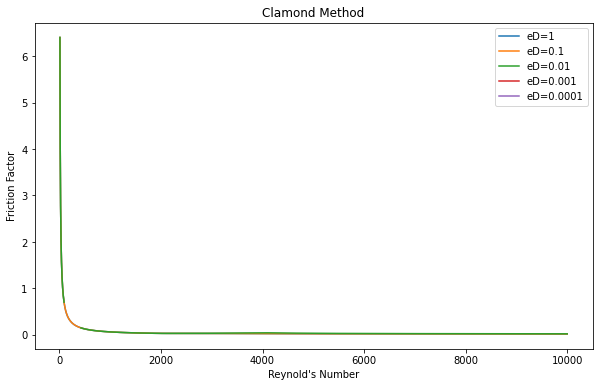

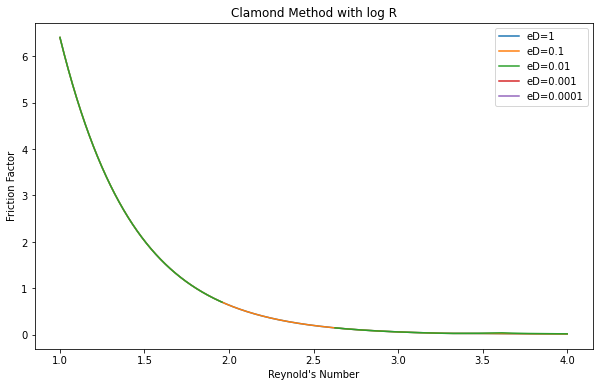

In [9]:
     
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Clamond Method')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Clamond Method with log R')
plt.legend()
plt.show()
                      


In [10]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f


In [11]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Brkic',
                         'Time': time}, ignore_index=True)

time
1.172200000041812e-06


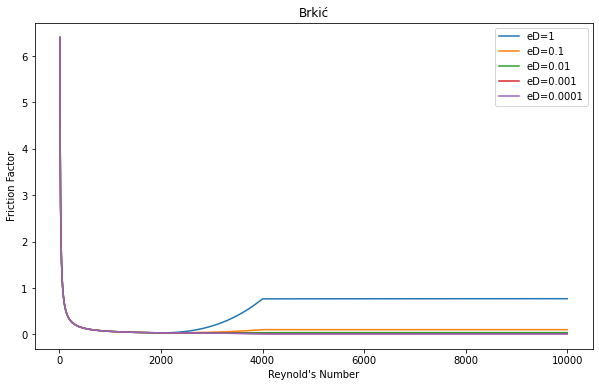

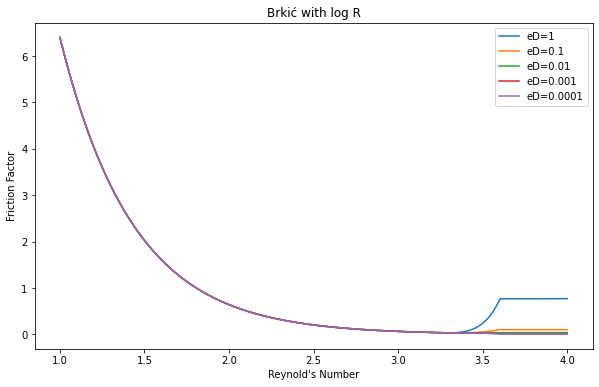

In [12]:

timeit.timeit("import time; time.sleep(1)", number=1)
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Brkić')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Brkić with log R')
plt.legend()
plt.show()


In [13]:
def JainSwamee(R,k,d):
    eD=k/d
    f=-2*np.log10((eD/(3715))+(5.74/(R)**0.9))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=JainSwamee(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+JainSwamee(R,k,d)*((R > 4000))
        return f

In [14]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'JainSwamee',
                         'Time': time}, ignore_index=True)

time
3.786940000009054e-05


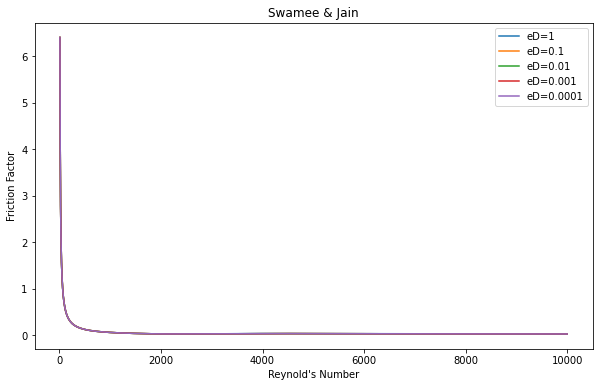

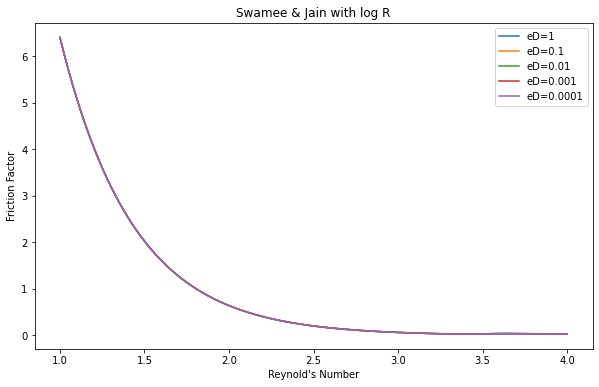

In [15]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
       

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Swamee & Jain')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Swamee & Jain with log R')
plt.legend()
plt.show()
                      


In [16]:
def Serghides1(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(psi1-((psi1-psi1)**2)/(psi3-2*psi2+psi1))**(-2)
    return f


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides1(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides1(R,k,d)*((R > 4000))
        return f


In [17]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Serghides1',
                         'Time': time}, ignore_index=True)

time
3.3010000004196627e-07


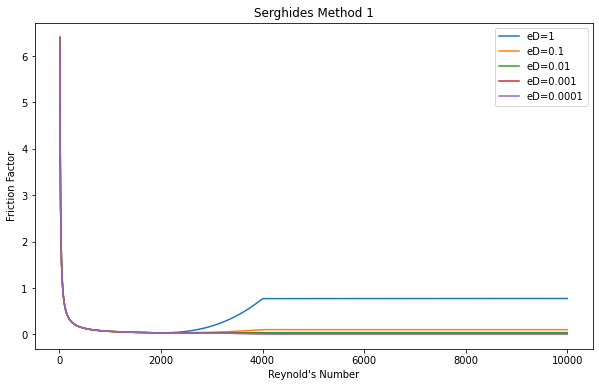

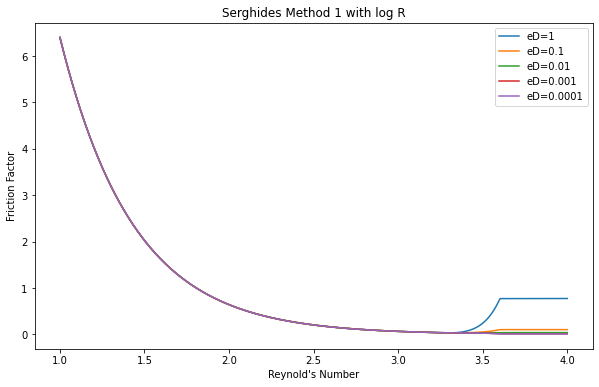

In [18]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 1')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 1 with log R')
plt.legend()
plt.show()
                      

In [19]:
def Serghides2(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(4.781-((psi2-4.781)**2)/(psi3-2*psi2+4.781))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides2(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides2(R,k,d)*((R > 4000))
        return f

In [20]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Serghides2',
                         'Time': time}, ignore_index=True)

time
5.0849500000140324e-05


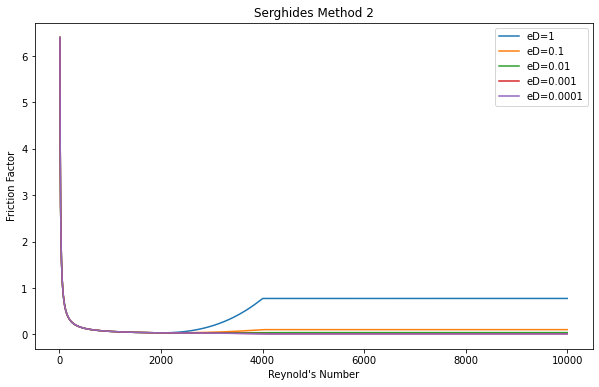

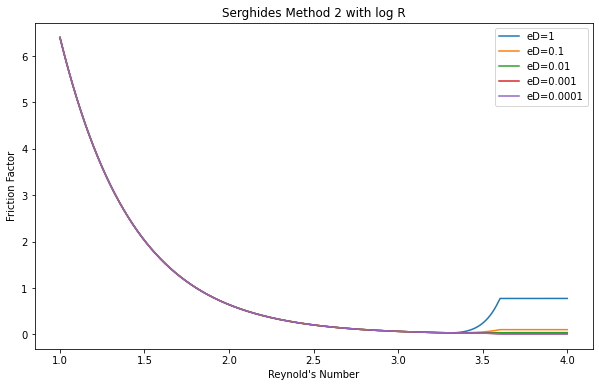

In [21]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 2')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 2 with log R')
plt.legend()
plt.show()
                      

In [22]:
def Dobromyslov(R,k,d):
    eD=k/d
    Rekv=500*(eD)
    B=(1+(np.log10(R)/np.log10(Rekv)))
    b=B*(B <= 2)+2*(B > 2)
    V=np.log10(3.7*eD)
    f=(0.5/V)*((b/2+(1.312*(2-b)*V)/(np.log10(R)-1)))
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Dobromyslov(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Dobromyslov(R,k,d)*((R > 4000))
        return f

In [23]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Dobromyslov',
                         'Time': time}, ignore_index=True)

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


time
8.451999999579129e-07


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


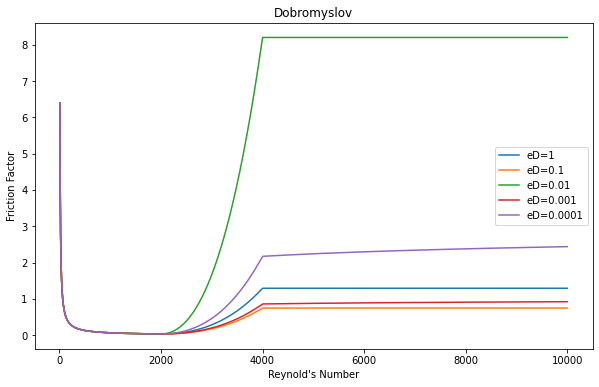

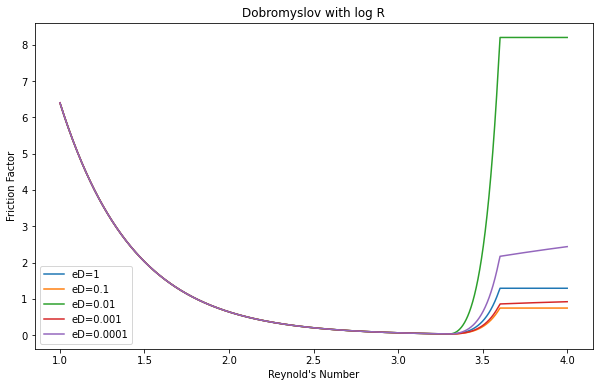

In [24]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
 

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Dobromyslov')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Dobromyslov with log R')
plt.legend()
plt.show()
 

In [25]:
def GoudarSonnad1(R,k,d):
    eD=k/d
    S=0.124*(R)*(eD)+np.log(0.4587*(R))
    T=(S/(S+1))
    F=0.8686*np.log((0.4587*(R))/((S-0.31)**T))
    f=1/(F*F)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad1(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad1(R,k,d)*((R > 4000))
        return f

In [26]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'GoudarSonnad1',
                         'Time': time}, ignore_index=True)

time
7.161999999425461e-07


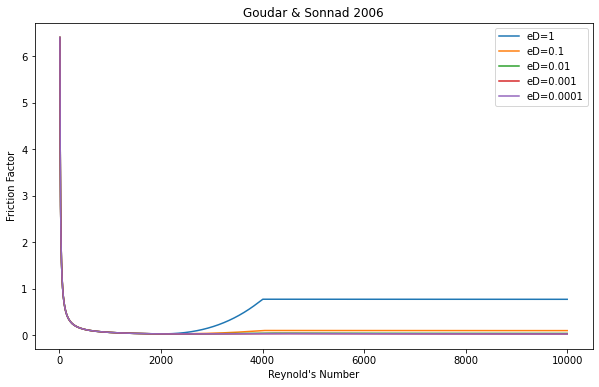

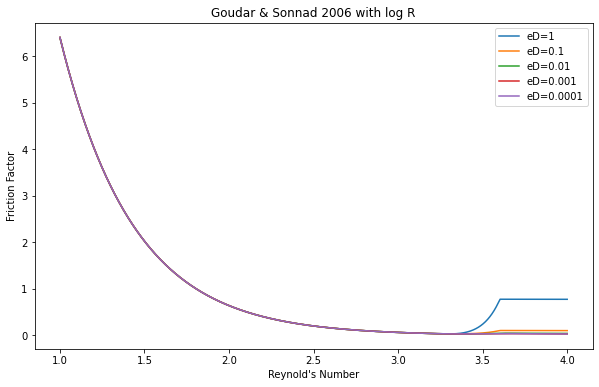

In [27]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1       

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2006')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2006 with log R')
plt.legend()
plt.show()
                      

In [28]:
def GoudarSonnad2(R,k,d):
    eD=k/d
    a=2/(np.log(10))
    b=eD/3.7
    da=np.log(10)*(R)/5.02
    s=b*da*np.log(da)
    q=s/(s**(s+1))
    g=b*da+np.log(d/q)
    z=np.log(q/g)
    dla=z*(g/(g+1)) 
    dcfa=dla*((1+((z/2)/((g+1)**2+(z/3)*(2*g-1)))))
    f=a-(np.log(da/q)+dcfa)
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad2(R,k,d)*((R > 4000))
        return f


In [29]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'GoudarSonnad2',
                         'Time': time}, ignore_index=True)

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning

time
2.8630000019802536e-07


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning

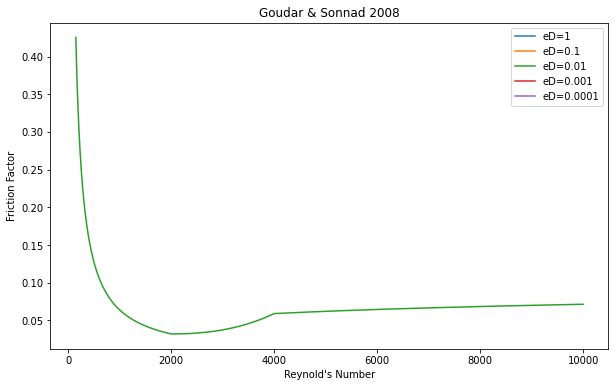

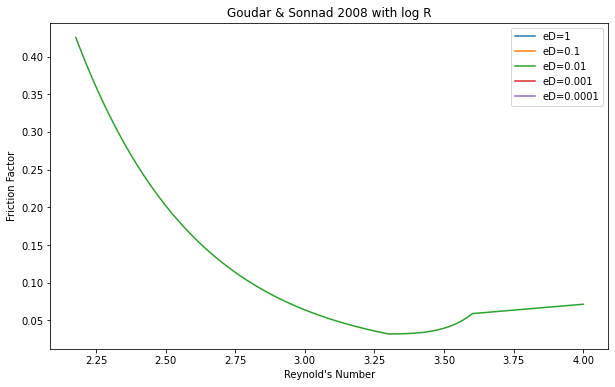

In [30]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2008')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2008 with log R')
plt.legend()
plt.show()
                      

In [31]:
def Blasius(R,k):
    f=0.316/(R**(1/4))*(k==0)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Blasius(X2,k)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Blasius(R,k)*((R > 4000))
        return f


In [32]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Blasius',
                         'Time': time}, ignore_index=True)

time
-2.776000001176726e-07


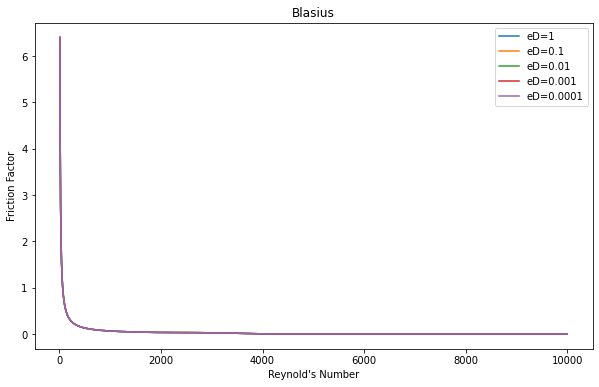

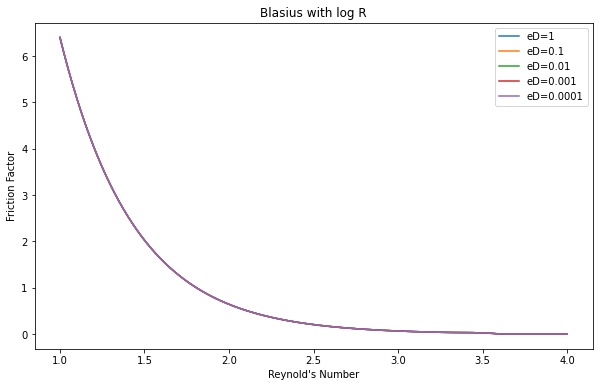

In [33]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
      

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Blasius')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Blasius with log R')
plt.legend()
plt.show()
                      

In [34]:
def haaland(R,k,d):
    eD=k/d
    f=-1.8*(np.log10(eD/3.7**1.11+69/R))
    f=1/(f*f)
    return f  


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=haaland(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+haaland(4000,k,d)*((R > 4000))
        return f


In [35]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Haaland',
                         'Time': time}, ignore_index=True)

time
6.127999999989697e-07


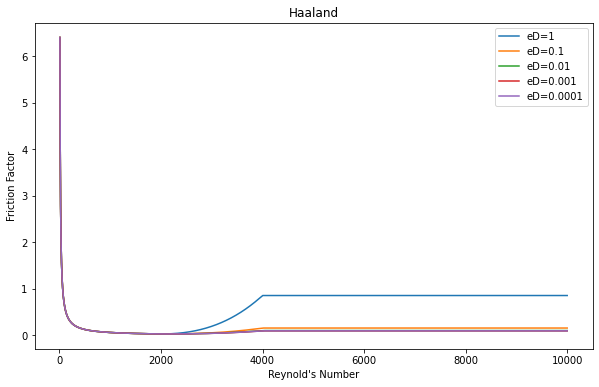

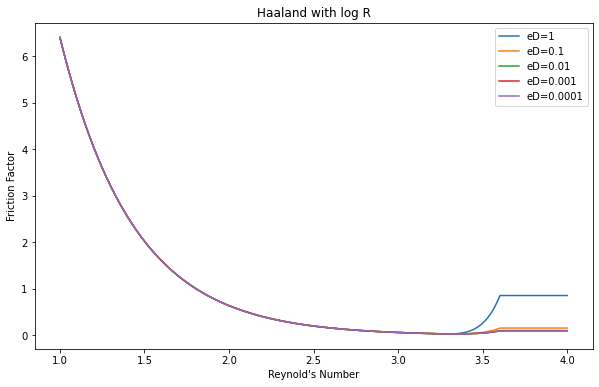

In [36]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Haaland')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Haaland with log R')
plt.legend()
plt.show()
                      

In [37]:
def Buzzelli(R,k,d):
    eD=k/d
    alpha=(0.744*np.log(R)-1.41)/(1+1.32*eD)
    beta=(R)*(eD/3.7)+2.51*alpha
    f=alpha-((alpha+2*np.log10(beta/(R)))/(1+2.18/beta))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Buzzelli(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Buzzelli(4000,k,d)*((R > 4000))
        return f


In [38]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Buzzelli',
                         'Time': time}, ignore_index=True)

time
8.43400000121619e-07


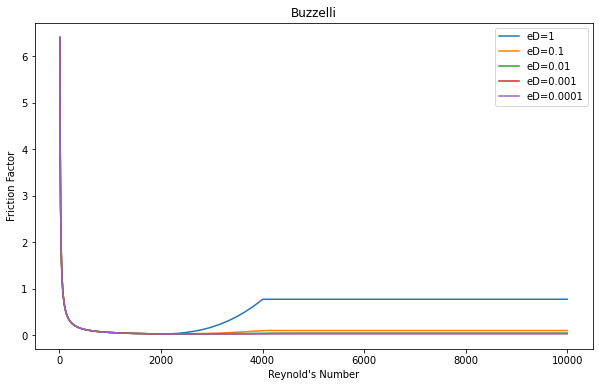

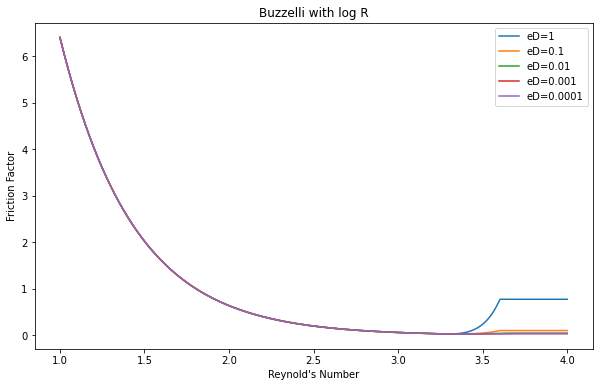

In [39]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Buzzelli')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Buzzelli with log R')
plt.legend()
plt.show()


In [40]:

def MonzonRomeoRoyo(R,k,d):
    eD=k/d
    f=-2*np.log10(eD/3.7)-(5.0272/(R))*np.log10(eD/3.827)*(4.657/(R))*np.log10(eD/(7.7918)**0.09924+(5.3326/(208.815+(R)))**0.9345)
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=MonzonRomeoRoyo(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+MonzonRomeoRoyo(4000,k,d)*((R > 4000))
        return f

In [41]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'MRR',
                         'Time': time}, ignore_index=True)

time
2.2445999998126355e-06


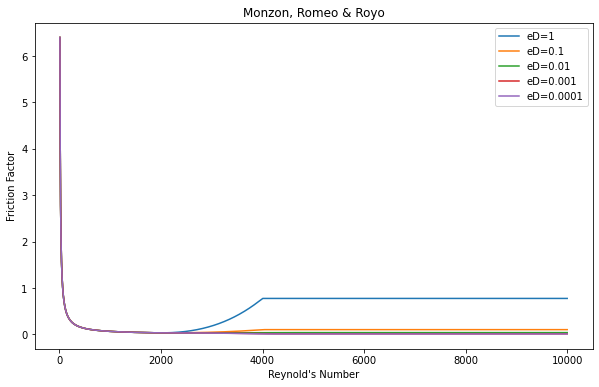

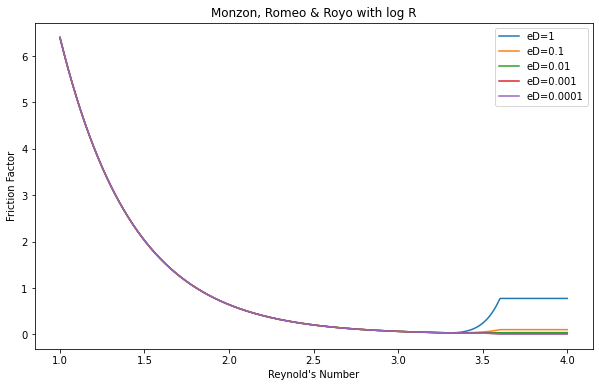

In [42]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Monzon, Romeo & Royo')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Monzon, Romeo & Royo with log R')
plt.legend()
plt.show()
                      

In [43]:

def moody(R,k,d):
    eD=k/d
    f=0.0055*(1+(2*(10**4)*(eD)+(10**6)/(R))**(1/3))
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=moody(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+moody(4000,k,d)*((R > 4000))
        return f

In [44]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Moody',
                         'Time': time}, ignore_index=True)

time
1.2464000001273235e-06


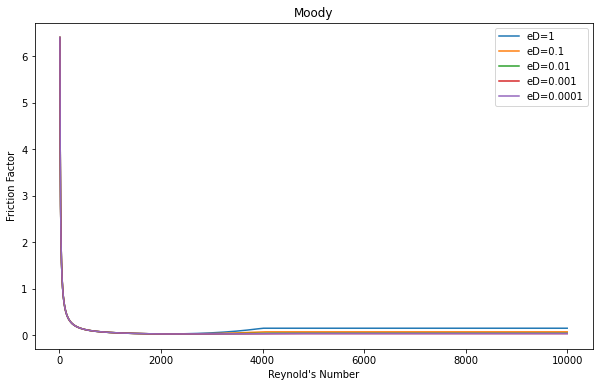

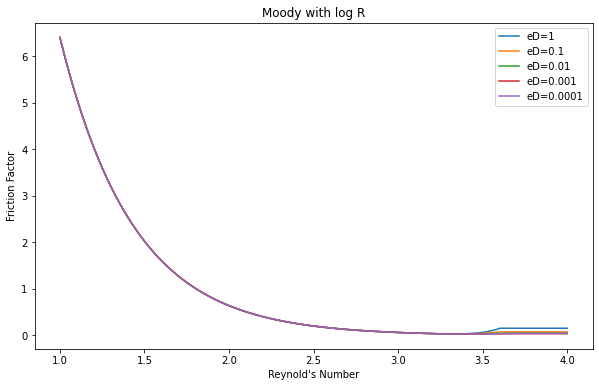

In [45]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Moody')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Moody with log R')
plt.legend()
plt.show()


In [46]:
def Vatankhan(R,k,d):
    eD=k/d
    S=0.124*(R)*(eD)+np.log10(0.4587*(R))
    f=0.8686*np.log10((0.4587*(R)/(S-0.31))**(S/(S+0.9633)))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Vatankhan(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Vatankhan(4000,k,d)*((R > 4000))
        return f

In [47]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Vatankhan',
                         'Time': time}, ignore_index=True)

time
-1.0834999998223794e-06


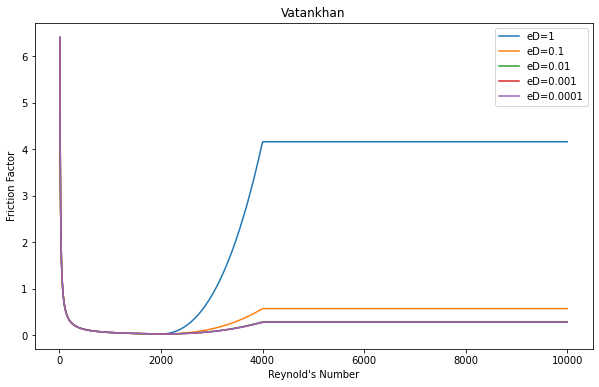

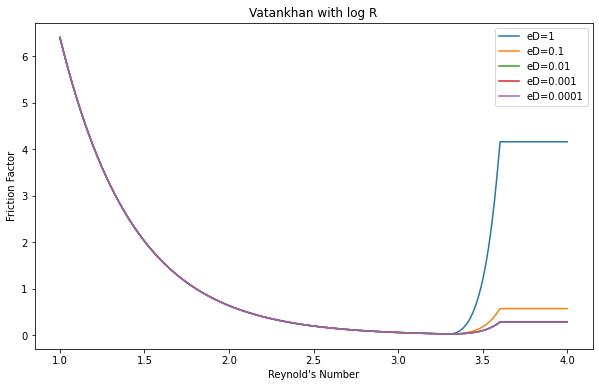

In [48]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Vatankhan')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Vatankhan with log R')
plt.legend()
plt.show()
                      

In [49]:
def EPT(R,k,d):
    eD=k/d
    f=(0.2479-0.0000947*(7-(np.log10(R)**4)/(np.log10(eD/3.615)+(7.366/(R**0.9142)))))
    return f
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=EPT(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+EPT(4000,k,d)*((R > 4000))
        return f

In [50]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'EPT',
                         'Time': time}, ignore_index=True)

time
3.072689999953582e-05


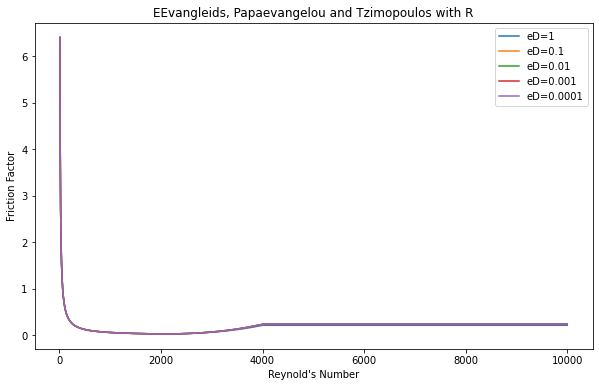

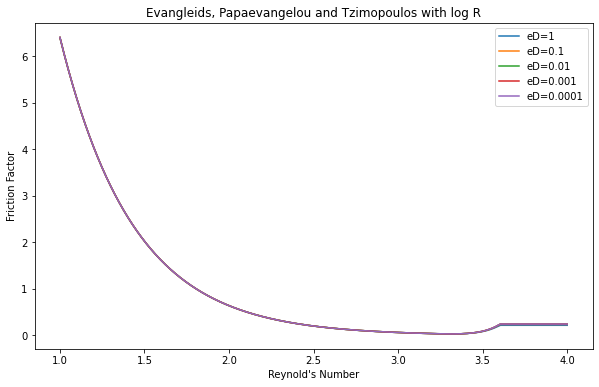

In [51]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('EEvangleids, Papaevangelou and Tzimopoulos with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Evangleids, Papaevangelou and Tzimopoulos with log R')
plt.legend()
plt.show()
                      

In [52]:
def RaoKumar(R,k,d):
    eD=k/d
    a=0.444
    b=0.135
    fRe=1-0.55*np.exp(-.33*(np.log(R/6.5))**2)
    B=((a+b*(R))/(R))*fRe
    f=2*np.log(eD/2*B)
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=RaoKumar(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+RaoKumar(4000,k,d)*((R > 4000))
        return f

In [53]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'RaoKumar',
                         'Time': time}, ignore_index=True)

time
-2.976999999191321e-07


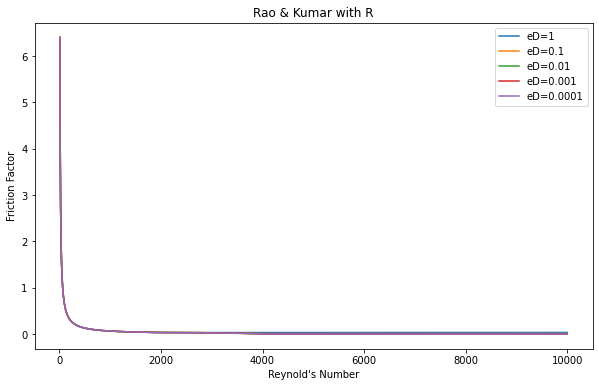

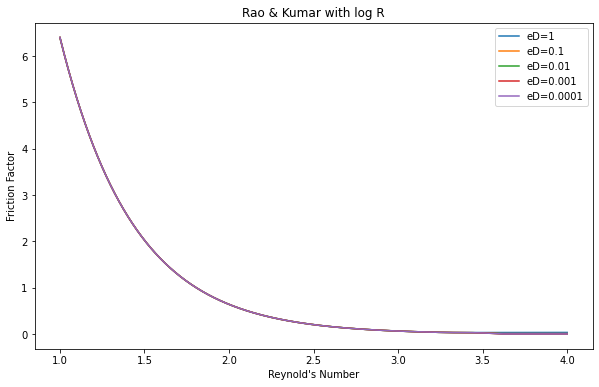

In [54]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Rao & Kumar with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Rao & Kumar with log R')
plt.legend()
plt.show()
                      

In [55]:

def Mandilli(R,k,d):
    eD=k/d
    p=2*np.log10(eD/3.7)+(95/(R**0.983))-(96.82/R)
    f=1/(p*p)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Mandilli(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Mandilli(4000,k,d)*((R > 4000))
        return f

In [56]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Mandilli',
                         'Time': time}, ignore_index=True)

time
2.9198900000210416e-05


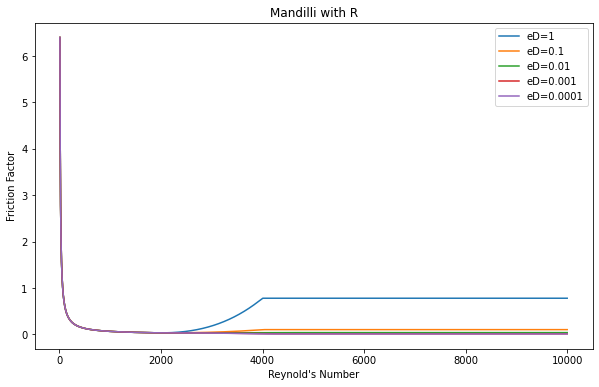

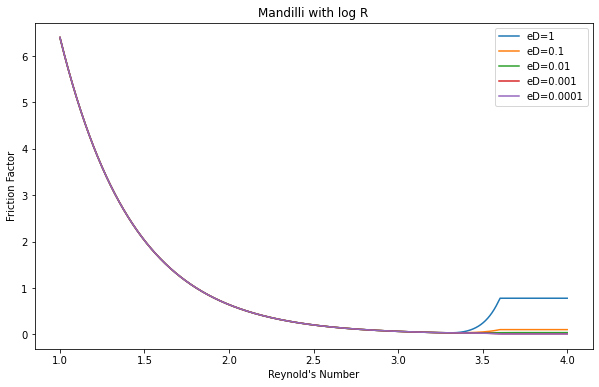

In [57]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Mandilli with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Mandilli with log R')
plt.legend()
plt.show()
                      

In [58]:
def nikuradse(R):
    f=0.0032+0.2211/((R)**0.237)
    return f
  
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=nikuradse(X2)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+nikuradse(4000)*((R > 4000))
        return f

In [59]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'Nikuradse',
                         'Time': time}, ignore_index=True)

time
7.024000001365494e-07


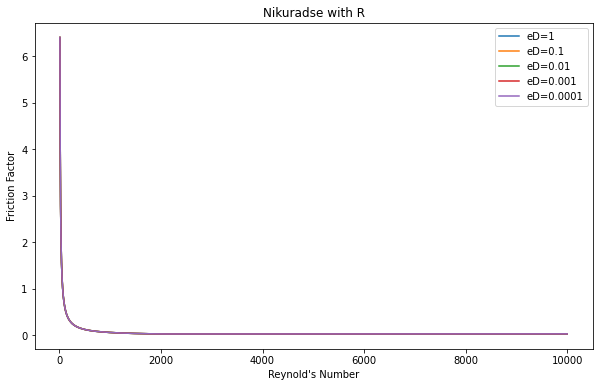

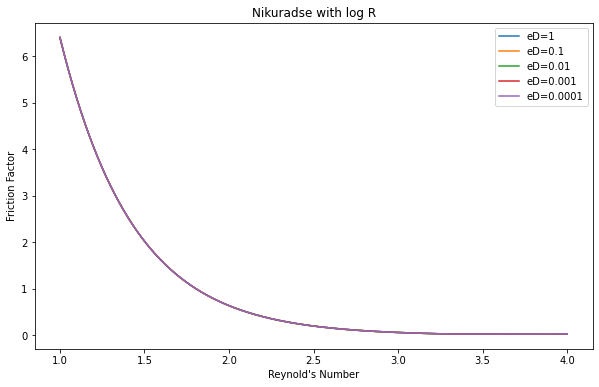

In [60]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Nikuradse with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Nikuradse with log R')
plt.legend()
plt.show()
                      

In [61]:

def ZigrangSylvester1(R,k,d):
    eD=k/d
    f=2*np.log10(eD/(3.7+(5.02/(R))*np.log10(eD/3.7)-(5.02/(R))*(np.log10(eD/(3.7)+13/(R)))))
    f=1/(f*f)
    return f
                                         
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=ZigrangSylvester1(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+ZigrangSylvester1(4000,k,d)*((R > 4000))
        return f

In [62]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'ZigrangSylvester1',
                         'Time': time}, ignore_index=True)

time
1.7500000012660167e-07


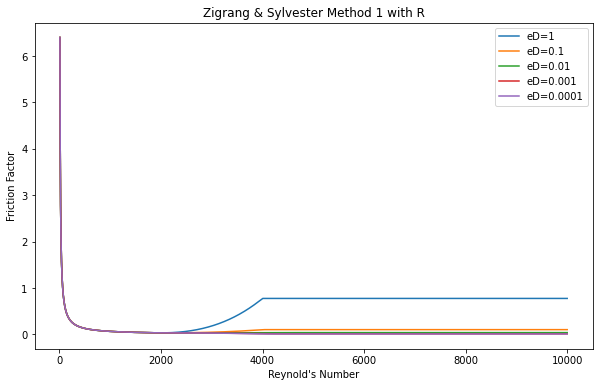

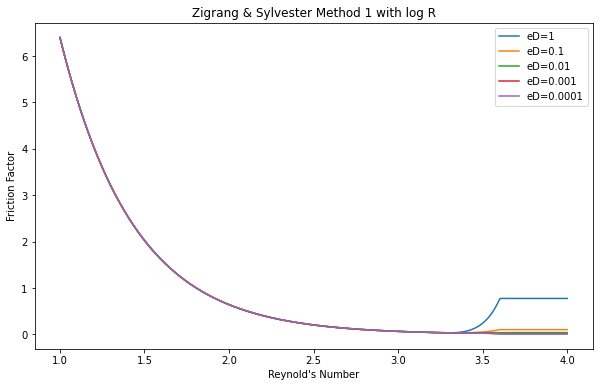

In [63]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 1 with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 1 with log R')
plt.legend()
plt.show()
                      


In [64]:
def ZigrangSylvester2(R,k,d):
    eD=k/d
    f=2*np.log(eD/3.7)+(5.02/R)*(np.log(eD/3.7)+13/R)
    f=1/(f*f)
    return f

                                         
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=ZigrangSylvester2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+ZigrangSylvester2(4000,k,d)*((R > 4000))
        return f

In [65]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

newDfObj = newDfObj.append({'Method': 'ZigrangSylvester2',
                         'Time': time}, ignore_index=True)

time
4.195400000025984e-05


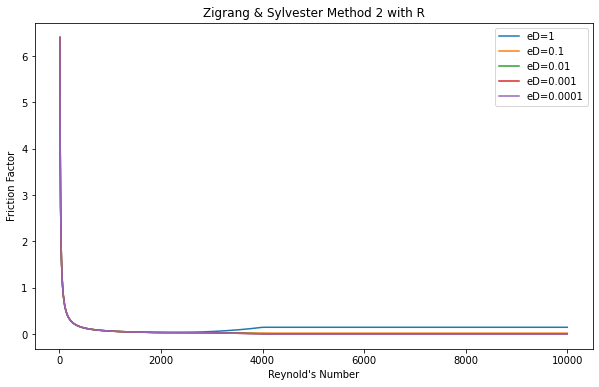

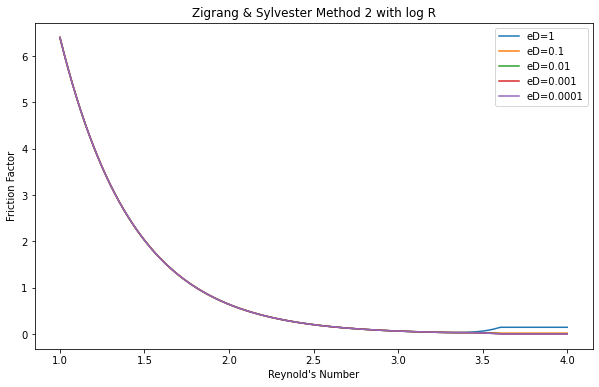

In [66]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 2 with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 2 with log R')
plt.legend()
plt.show()
                      

In [67]:
print(newDfObj)

               Method          Time
0             Laminar  8.550600e-06
1             Laminar  8.550600e-06
2             Clamond  3.124970e-05
3               Brkic  1.172200e-06
4          JainSwamee  3.786940e-05
5          Serghides1  3.301000e-07
6          Serghides2  5.084950e-05
7         Dobromyslov  8.452000e-07
8       GoudarSonnad1  7.162000e-07
9       GoudarSonnad2  2.863000e-07
10            Blasius -2.776000e-07
11            Haaland  6.128000e-07
12           Buzzelli  8.434000e-07
13                MRR  2.244600e-06
14              Moody  1.246400e-06
15          Vatankhan -1.083500e-06
16                EPT  3.072690e-05
17           RaoKumar -2.977000e-07
18           Mandilli  2.919890e-05
19          Nikuradse  7.024000e-07
20  ZigrangSylvester1  1.750000e-07
21  ZigrangSylvester2  4.195400e-05


In [102]:

newDfObj['-Log(abs[Time])'] = -1*np.log10(np.absolute(newDfObj.Time))
print(newDfObj)


               Method          Time  Log(abs[Time])  -Log(abs[Time])
0             Laminar  8.550600e-06       -5.068003         5.068003
1             Laminar  8.550600e-06       -5.068003         5.068003
2             Clamond  3.124970e-05       -4.505154         4.505154
3               Brkic  1.172200e-06       -5.930998         5.930998
4          JainSwamee  3.786940e-05       -4.421712         4.421712
5          Serghides1  3.301000e-07       -6.481354         6.481354
6          Serghides2  5.084950e-05       -4.293713         4.293713
7         Dobromyslov  8.452000e-07       -6.073041         6.073041
8       GoudarSonnad1  7.162000e-07       -6.144966         6.144966
9       GoudarSonnad2  2.863000e-07       -6.543179         6.543179
10            Blasius -2.776000e-07       -6.556581         6.556581
11            Haaland  6.128000e-07       -6.212681         6.212681
12           Buzzelli  8.434000e-07       -6.073966         6.073966
13                MRR  2.244600e-0

               Method          Time  Log(abs[Time])  -Log(abs[Time])
1             Laminar  8.550600e-06       -5.068003         5.068003
2             Clamond  3.124970e-05       -4.505154         4.505154
3               Brkic  1.172200e-06       -5.930998         5.930998
4          JainSwamee  3.786940e-05       -4.421712         4.421712
5          Serghides1  3.301000e-07       -6.481354         6.481354
6          Serghides2  5.084950e-05       -4.293713         4.293713
7         Dobromyslov  8.452000e-07       -6.073041         6.073041
8       GoudarSonnad1  7.162000e-07       -6.144966         6.144966
9       GoudarSonnad2  2.863000e-07       -6.543179         6.543179
10            Blasius -2.776000e-07       -6.556581         6.556581
11            Haaland  6.128000e-07       -6.212681         6.212681
12           Buzzelli  8.434000e-07       -6.073966         6.073966
13                MRR  2.244600e-06       -5.648861         5.648861
14              Moody  1.246400e-0

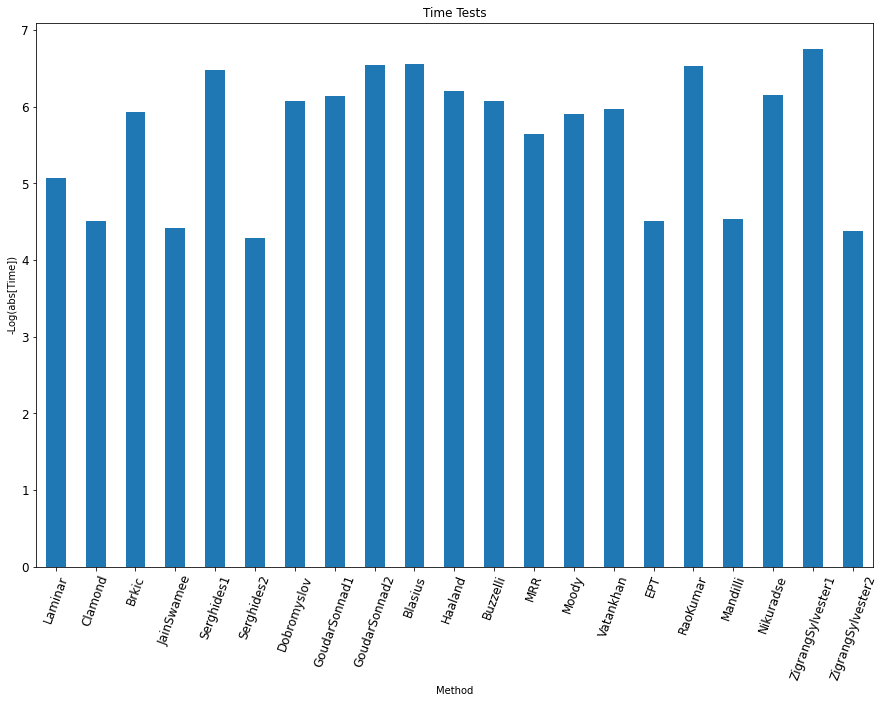

In [105]:
newdf2 = newDfObj.drop(index=0)
print(newdf2)
newdf2.plot.bar(x="Method", y="-Log(abs[Time])", rot=70, title="Time Tests", xlabel="Method", ylabel="-Log(abs[Time])", figsize=(15, 10), legend=False, fontsize=12)
plt.show()


In [106]:
newDfObj.to_csv(r'C:\Test3\Example2.csv')